# 实验：线性分类和梯度下降

## 1. 读取实验数据，划分训练集合验证集

In [172]:
# write your code here
import sklearn
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import jupyter
import matplotlib
from scipy.sparse import csr_matrix

mem = Memory("./mycache")


@mem.cache
def get_data():
    data = load_svmlight_file("./data/australian_scale")
    return data[0], data[1]

X, y = get_data()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)


## 2.初始化模型参数

In [177]:
m, n = np.shape(X_train)
# 迭代次数
iterations = 1000
# 学习率
alpha = 0.001
# 参数W
W = np.zeros((n, 1))

C = 0.01

## 3.选择Loss函数

In [178]:
# 计算损失
# def getLoss(X, y, W):
#     m = float(y.shape[0])
    
#     tmp1 = X.dot(W)
#     # 设定阈值
#     tmp2 = (tmp1 >= 0) * 1 + (tmp1 < 0) * -1
#     Loss = (np.sum((tmp2 - y) ** 2)) / (2 * m)
#     return Loss

# SVM
def getLoss(X, y, W):
    return  1/2 * np.sum(np.square(W[:-1]))  + C * np.sum(np.maximum(0, 1 - np.multiply(y, X.dot(W))))
    

## 4.训练

In [181]:
# 存储历史Loss
loss_trains = np.zeros((iterations, 1))
loss_validations = np.zeros((iterations, 1))

# X_train = X_train.toarray()
# X_valid = X_valid.toarray()
y_train = y_train.reshape(-1,1)
y_valid = y_valid.reshape(-1,1)

# for iter in range(iterations):
#     G = (X_train.T.dot(X_train.dot(W) - y_train))/m
#     W = W - alpha * G
#     loss_trains[iter] = getLoss(X_train, y_train, W)
#     loss_validations[iter] = getLoss(X_valid, y_valid, W)

for iter in range(iterations):
    margin = 1 - np.multiply(y_train, X_train.dot(W))
    minus_y = -y_train
    minus_y[margin<0] = 0
    result = W + C * X_train.T.dot(minus_y)
    result[-1] -= W[-1]
    G = result
    W = W - alpha * G
    loss_trains[iter] = getLoss(X_train, y_train, W)
    loss_validations[iter] = getLoss(X_valid, y_valid, W)
      
    
for j in loss_trains:
    print("Train loss:%f" % j[0])
for j in loss_validations:
    print("Validation loss:%f" % j[0])

print(loss_validations[0].min())
print(W)


Train loss:1.832125
Train loss:1.832036
Train loss:1.831947
Train loss:1.831858
Train loss:1.831769
Train loss:1.831681
Train loss:1.831592
Train loss:1.831504
Train loss:1.831417
Train loss:1.831329
Train loss:1.831241
Train loss:1.831154
Train loss:1.831066
Train loss:1.830979
Train loss:1.830892
Train loss:1.830806
Train loss:1.830719
Train loss:1.830632
Train loss:1.830546
Train loss:1.830460
Train loss:1.830375
Train loss:1.830289
Train loss:1.830203
Train loss:1.830118
Train loss:1.830032
Train loss:1.829948
Train loss:1.829863
Train loss:1.829778
Train loss:1.829693
Train loss:1.829609
Train loss:1.829525
Train loss:1.829441
Train loss:1.829358
Train loss:1.829274
Train loss:1.829190
Train loss:1.829107
Train loss:1.829023
Train loss:1.828940
Train loss:1.828858
Train loss:1.828775
Train loss:1.828693
Train loss:1.828610
Train loss:1.828528
Train loss:1.828446
Train loss:1.828364
Train loss:1.828283
Train loss:1.828201
Train loss:1.828120
Train loss:1.828038
Train loss:1.827957


Train loss:1.804018
Train loss:1.804007
Train loss:1.803995
Train loss:1.803984
Train loss:1.803973
Train loss:1.803961
Train loss:1.803950
Train loss:1.803938
Train loss:1.803927
Train loss:1.803917
Train loss:1.803905
Train loss:1.803894
Train loss:1.803883
Train loss:1.803871
Train loss:1.803860
Train loss:1.803849
Train loss:1.803838
Train loss:1.803827
Train loss:1.803816
Train loss:1.803806
Train loss:1.803795
Train loss:1.803783
Train loss:1.803772
Train loss:1.803761
Train loss:1.803751
Train loss:1.803740
Train loss:1.803730
Train loss:1.803719
Train loss:1.803707
Train loss:1.803696
Train loss:1.803686
Train loss:1.803675
Train loss:1.803664
Train loss:1.803654
Train loss:1.803644
Train loss:1.803633
Train loss:1.803624
Train loss:1.803611
Train loss:1.803601
Train loss:1.803590
Train loss:1.803580
Train loss:1.803570
Train loss:1.803559
Train loss:1.803549
Train loss:1.803539
Train loss:1.803528
Train loss:1.803518
Train loss:1.803507
Train loss:1.803498
Train loss:1.803487


## 5.绘制Loss train和Loss validation随迭代次数的变化图

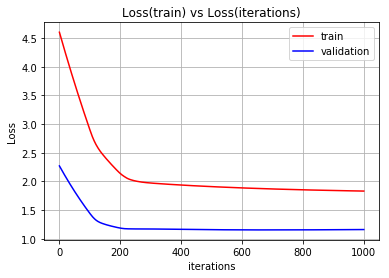

In [180]:
import matplotlib.pyplot as plt  
 
table_x = range(1,iterations+1)
plt.title('Loss(train) vs Loss(iterations)')  
plt.xlabel('iterations')  
plt.ylabel('Loss')  

plt.plot(table_x, loss_trains,'r', label='train')  
plt.plot(table_x, loss_validations,'b',label='validation')  
  
plt.legend(bbox_to_anchor=[1, 1])  
plt.grid()  
plt.show()